# Train a classifier of Dogs and Cats based on RESNET18
## Implemented through transfer learning

###### Author: Tiernan Lindauer

In [1]:
from fastai.data.external import URLs, untar_data
from fastai.vision.all import *

Collect data from the FastAI repository `.tar` file

In [2]:
path = untar_data(URLs.DOGS)

In [4]:
# create a DataBlock to train with
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32, num_workers=0)

In [5]:
print("Done creating data block.")

Done creating data block.


In [ ]:
Display some sample images

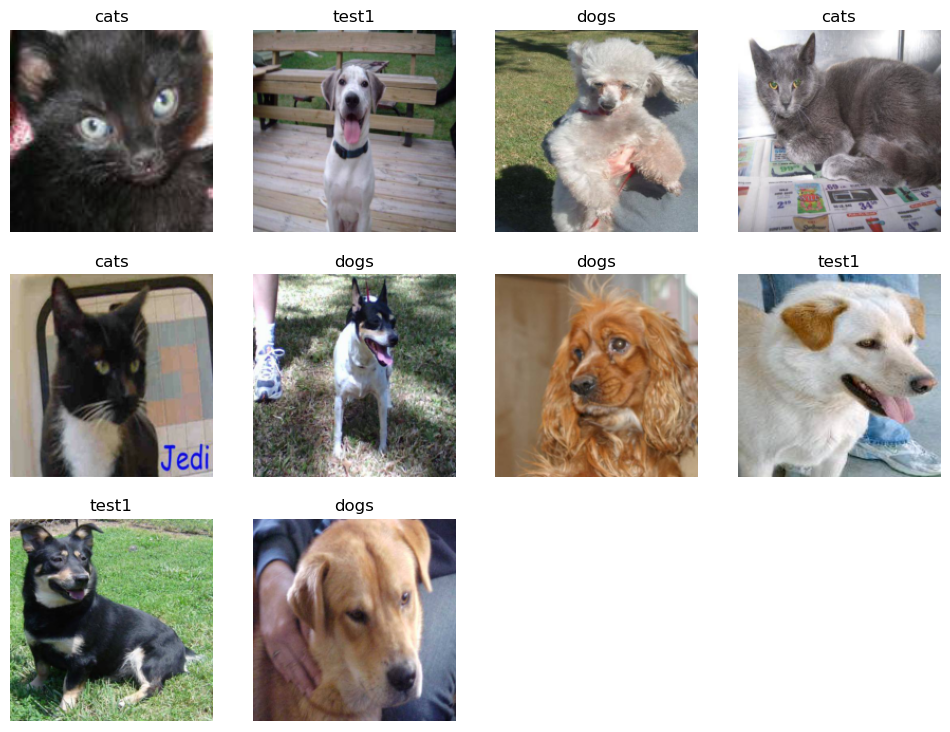

In [10]:
dls.show_batch(max_n=10)
plt.show()

In [ ]:
Train the network on the `RESNET18` structure

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jupyter-tlindauer/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,0.818832,0.752810,0.370602,06:42


epoch,train_loss,valid_loss,error_rate,time
0,0.744726,0.696942,0.358076,07:35
1,0.682465,0.682063,0.361674,07:35
2,0.566353,0.733951,0.390991,07:35


In [11]:
for fname in ['cat.jpg', 'dog.jpg']:
    category,index,probs = learn.predict(PILImage.create(fname))
    print(f"{fname} is a: {category} with confidence level: {probs[index]:.4f}")

cat.jpg is a: cats with confidence level: 0.8665


dog.jpg is a: dogs with confidence level: 0.7480


In [ ]:
learn.save("CatsDogsClassifier")